# Project 2- No-Show Apointments.
#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


Dataset


1. PatienID-> Identification of the patient
2. AppointmentID-> Identification number of the patient
3. Gender-> Gender of the patient
4. ScheduledDay-> Shows the date on which the appointment was scheduled. 
5. AppointmentDay-> Displays the date of the appointment
6. Neighbourhood-> Location of the hospital
7. Scholarship-> Indicated is the patient receives a scholarship
8. Hipertension-> Displays if the patient has hypertension
9. Diabetes-> Displays if the patient has diabetes
10. Alcoholism-> Shows if the patient is an alcoholic
11. Handcap-> Shows if the patient is handicaped
12. SMS_received-> Shows if message is sent to the patient
13. No-show-> It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

### Reading the dataset

In [2]:
df=pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Analysing the data

#### Checking the size of the data frame.

In [3]:
df.shape

(110527, 14)

Inference- The dataframe has 110527 rows and 14 columns.


#### Printing the columns present in the dataframe

In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Inference- We can see that there are many spelling errors. We will correct these spelling errors first.

In [5]:
df.rename(columns={'Hipertension':'Hypertension','PatientId':'Patient_ID','AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','Handcap':'Handicap','No-show':'No_Show'},inplace=True)

In [6]:
df.columns

Index(['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No_Show'],
      dtype='object')

#### Checking for Duplicate values in the data frame

In [7]:
sum(df.duplicated())

0

Inference- No duplicates are present in the dataframe

#### Checking for the null values

In [8]:
df.isnull().sum()

Patient_ID         0
Appointment_ID     0
Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS_received       0
No_Show            0
dtype: int64

Inference- No Null values present in the dataframe.

#### Checking for the data types of the columns

In [9]:
df.dtypes

Patient_ID         float64
Appointment_ID       int64
Gender              object
Scheduled_Day       object
Appointment_Day     object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS_received         int64
No_Show             object
dtype: object

Inference- We can see that there are some variables that we need to change the data types, we will see the varibles individually and change the data types.

In [10]:
df.Patient_ID.unique()

array([2.98724998e+13, 5.58997777e+14, 4.26296230e+12, ...,
       7.26331493e+13, 9.96997666e+14, 1.55766317e+13])

Inference- Patient ID has to be an integer value not a float value.

In [11]:
df['Patient_ID']=df['Patient_ID'].astype('int64')

In [12]:
df['Patient_ID'].dtype

dtype('int64')

In [13]:
df.Appointment_ID.unique()

array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448],
      dtype=int64)

Inference- No changes need to be done in appointment ID column.

In [14]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

Inference- Gender is in two types M and F, hence no changes necessary.

In [15]:
df.Scheduled_Day.unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

Inference- Schedule Day has to be in date and time format. Hence we need to change it.

In [16]:
df.Scheduled_Day=df.Scheduled_Day.apply(np.datetime64)
df.Scheduled_Day.unique()

array(['2016-04-29T18:38:08.000000000', '2016-04-29T16:08:27.000000000',
       '2016-04-29T16:19:04.000000000', ...,
       '2016-04-27T16:03:52.000000000', '2016-04-27T15:09:23.000000000',
       '2016-04-27T13:30:56.000000000'], dtype='datetime64[ns]')

In [17]:
df.Appointment_Day.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

Inference- Appointment Day has to be in date and time format. Hence we need to change it.

In [18]:
df.Appointment_Day=df.Appointment_Day.apply(np.datetime64)
df.Appointment_Day.unique()

array(['2016-04-29T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-10T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
       '2016-05-16T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
       '2016-05-19T00:00:00.000000000', '2016-05-12T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-05-20T00:00:00.000000000',
       '2016-05-05T00:00:00.000000000', '2016-05-13T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', '2016-05-25T00:00:00.000000000',
       '2016-05-11T00:00:00.000000000', '2016-05-18T00:00:00.000000000',
       '2016-05-14T00:00:00.000000000', '2016-06-02T00:00:00.000000000',
       '2016-06-03T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-06-07T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000'], dtype='dat

In [19]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

Inference- Age variable has a negative values. Hence we get rid of the outliers

In [20]:
df = df[(df.Age)>=0]

In [21]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

In [22]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

Inference- The columns gives us the location where the hospital is situated.

In [23]:
df.Scholarship.unique()

array([0, 1], dtype=int64)

Inference- It has 2 unique values, whether the patient qualifies for scholarship or not.

In [24]:
df.Hypertension.unique()

array([1, 0], dtype=int64)

Inference- It has 2 unique values, whether the patient has hypertension or not.

In [25]:
df.Diabetes.unique()

array([0, 1], dtype=int64)

Inference- It has 2 unique values, whether the patient has diabetes or not.

In [26]:
df.Alcoholism.unique()

array([0, 1], dtype=int64)

Inference- It has 2 unique values, whether the patient is an alcoholic or not.

In [27]:
df.Handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

Inference- It has 5 unique values, displaying various disabilities the patient has.

In [28]:
df.SMS_received.unique()

array([0, 1], dtype=int64)

Inference- It has 2 unique values, whether the patient has received the SMS or not.

In [29]:
df.No_Show.unique()

array(['No', 'Yes'], dtype=object)

Inference- It has 2 unique values, whether the patient showed up for their appointment or not. NO says they showed up and YES says they didnt show up.

#### Add a new column, with the name wait to see what was the waiting period between the scheduling date and the appointment date.

In [30]:
df['Wait']=(df.Appointment_Day.dt.date-df.Scheduled_Day.dt.date).dt.days
df=df[df.Wait>=0]

#### Add a new column, showing the appointment day

In [31]:
df['Appointment_day']=df.Scheduled_Day.dt.day_name()

In [32]:
df.Appointment_day.value_counts()

Tuesday      26167
Wednesday    24259
Monday       23084
Friday       18915
Thursday     18072
Saturday        24
Name: Appointment_day, dtype: int64

Inference- We can see that very few appointements have been schedued on saturdays on comparision with other days. Tuesdays are the busiest as there are the most number of scheduled appointments.

In [33]:
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Wait,Appointment_day
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


## Observations

We first plot histogram to see what observations can be drawn from it.

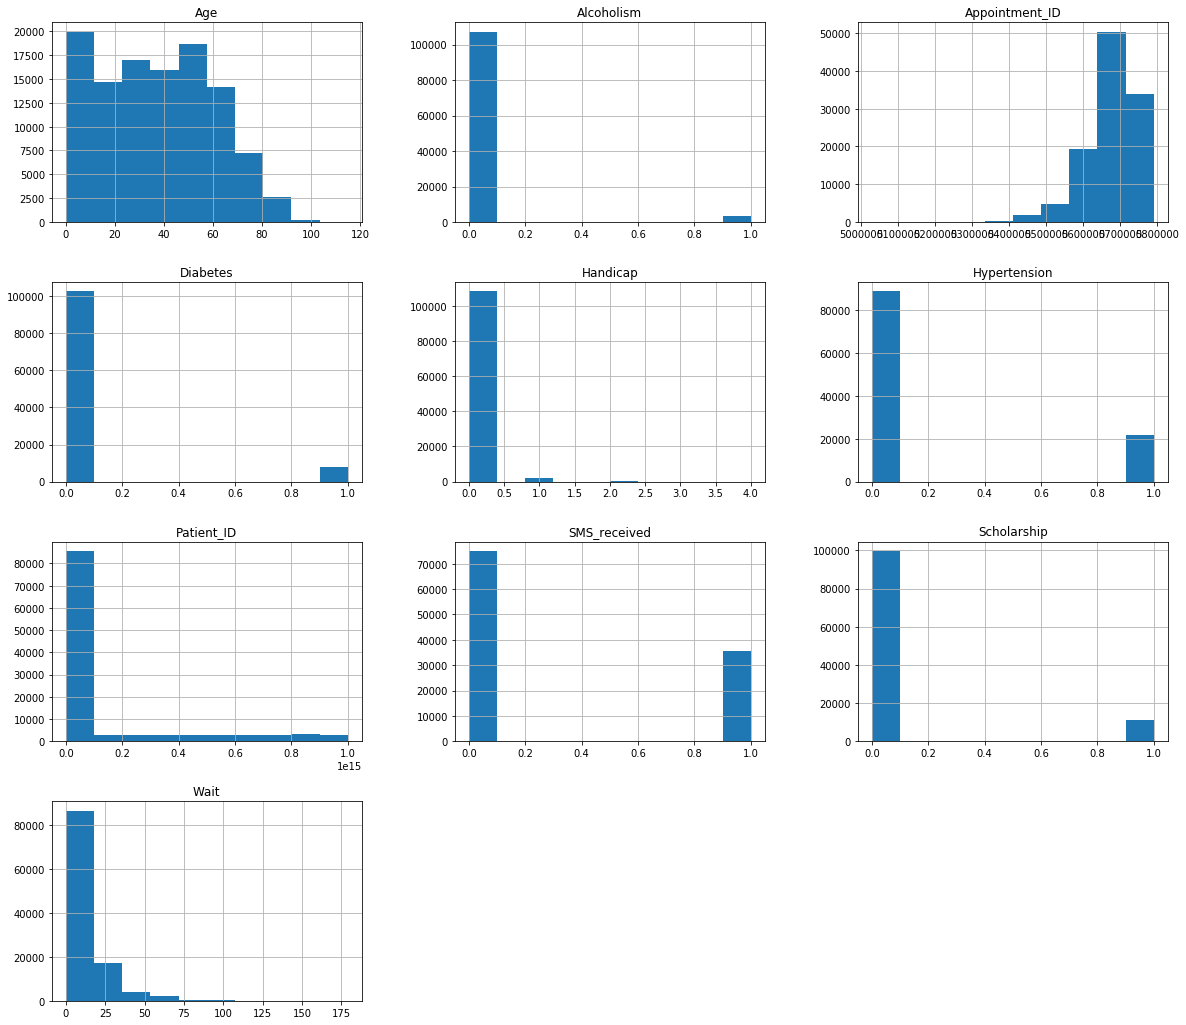

In [34]:
df.hist(figsize=(20,18));

Inference-
1. From the 1st graph we can observe the histogram is somewhat evenly distriutes, hence there are patients from all age groups also we can see that children and infants are in bigger numbers compared to adults.
2. The 2nd graph shows the people who are addicted to alcohol, we can observe that majority of the people are not addicted to alcohol.
3. The 4th graph shows the diabetic patients, we can observe that majority of the people are not diabetic.
4. The 5th graph shows the handicap patients, we can observe that majority of the people are normal.
5. The 6th graph shows the patients who have hypertension, we can observe that majority of the people who don't exhibit hypertension even though there are some people who exhibit hypertension.
6. The 8th graph shows the patients who have received SMS, we can observe that majority of the people have received the SMS and a lot have not received.
7. The 9th graph shows the patients who have got the scholarship, there are majority of people who have not got the scholarship.
8. The 10th graph show the wait period for the patients, it shows that a lot people have less waiting period almost less than 20 days, whereas there are some people whose waiting period is more than 75 days also. 

## What percent of people have missed their appointments?

In [35]:
x= (df[['No_Show']]=='Yes').sum()
y= (df[['No_Show']]=='No').sum()

percent= ((x)/(x+y))*100
percent

No_Show    20.189828
dtype: float64

Inference- There are 20.19% of people who have missed their appointments.

## Does the day of the appointment affect the patient's presence?

In [36]:
day=df.groupby('Appointment_day').No_Show.value_counts()
day

Appointment_day  No_Show
Friday           No         15028
                 Yes         3887
Monday           No         18523
                 Yes         4561
Saturday         No            23
                 Yes            1
Thursday         No         14373
                 Yes         3699
Tuesday          No         20877
                 Yes         5290
Wednesday        No         19383
                 Yes         4876
Name: No_Show, dtype: int64

To get a more statiscal picture we calculate the percentage.

In [37]:
percent= []
i=0
while i<len(day)-1:
  percent.append( day[i+1] *100 /(day[i]+day[i+1])  )
  i=i+2
percent

[20.54982817869416,
 19.758274129267026,
 4.166666666666667,
 20.46812749003984,
 20.21630297703214,
 20.099756791293952]

Plotting a graph

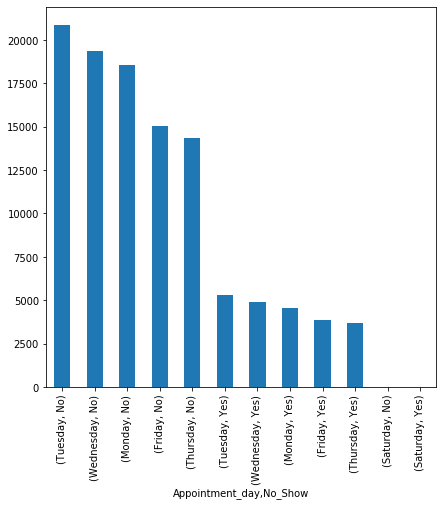

In [38]:
day=day.sort_values(ascending=False)
day.plot(kind='bar',figsize=(7,7));

Inference-
1. Looking at the bar graph, we can see that maximum appointements we attended as well as missed on tuesday.
2. After tuesday, wednesday had the most number of appointments attended as well as missed.
3. Followed by it monday, friday and thurday had lesser patients who had attended or missed the appointment
4. Looking at the statistical percent data we can say that approximately 20% of the total appointments were missed and on saturday the least number of appointments were missed. i.e. is 4%.

## Does sending a sms affect the patient's attendance?

In [41]:
msg= df.groupby("SMS_received").No_Show.value_counts()
msg

SMS_received  No_Show
0             No         62509
              Yes        12530
1             No         25698
              Yes         9784
Name: No_Show, dtype: int64

Calculating the percentage 

In [42]:
Msg_not_received = msg[0][1]*100/(msg[0][0]+msg[0][1])
print(Msg_not_received)

16.697983715134797


In [43]:
Msg_received = msg[3]*100/(msg[2]+msg[3])
print(Msg_received)

27.574544839637


Plotting a graph for better understanding

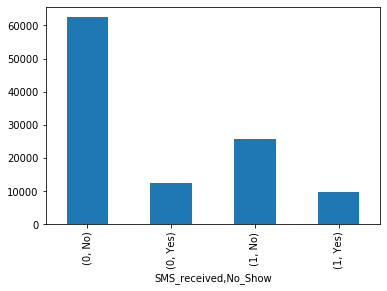

In [44]:
msg.plot(kind='bar')

Inference:
1. 16% of people who did not receive the SMS missed the appoinment.
2. 27% of patients missed the appointent in spite of getting a SMS.
3. Patients receiving SMS had more probabilty of missing thier appointents.



## Is a person have a medical issue more likely to have a no show?

In [46]:
hypertension_data = df.groupby('Hypertension').No_Show.value_counts()
diabetes_data = df.groupby('Diabetes').No_Show.value_counts()
alcoholism_data = df.groupby('Alcoholism').No_Show.value_counts()
hypertension_data, diabetes_data, alcoholism_data

(Hypertension  No_Show
 0             No         70178
               Yes        18542
 1             No         18029
               Yes         3772
 Name: No_Show, dtype: int64, Diabetes  No_Show
 0         No         81694
           Yes        20884
 1         No          6513
           Yes         1430
 Name: No_Show, dtype: int64, Alcoholism  No_Show
 0           No         85524
             Yes        21637
 1           No          2683
             Yes          677
 Name: No_Show, dtype: int64)

Plotting graphs for better understanding

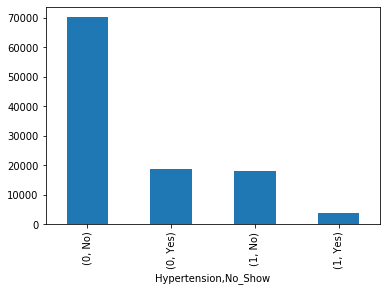

In [47]:
hypertension_data.plot(kind="bar")

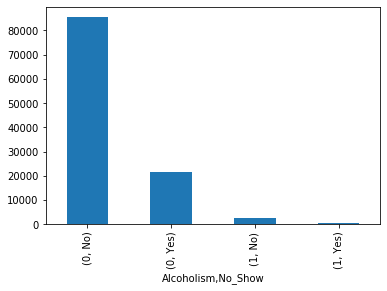

In [48]:
alcoholism_data.plot(kind='bar')

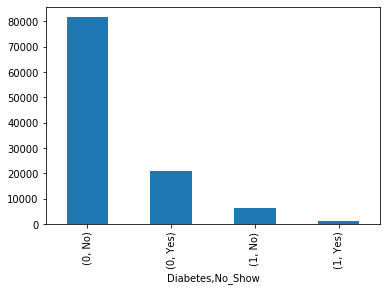

In [49]:
diabetes_data.plot(kind="bar")

Inference:


*   The percent of no shows for a patient with a medical condition is approximately equal to the percent of no shows for a patient without a pre existing medical condition


## Which neighbourhoods have highest numbers of no-shows?

Neighbourhoods having most amount of No-Shows

In [50]:
area_df= df.query('No_Show=="Yes"').groupby("Neighbourhood").No_Show.count()
area_df.sort_values(ascending=False, inplace=True)
area_df

Neighbourhood
JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     905
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: No_Show, Length: 80, dtype: int64

PLotting a graph  for better understanding

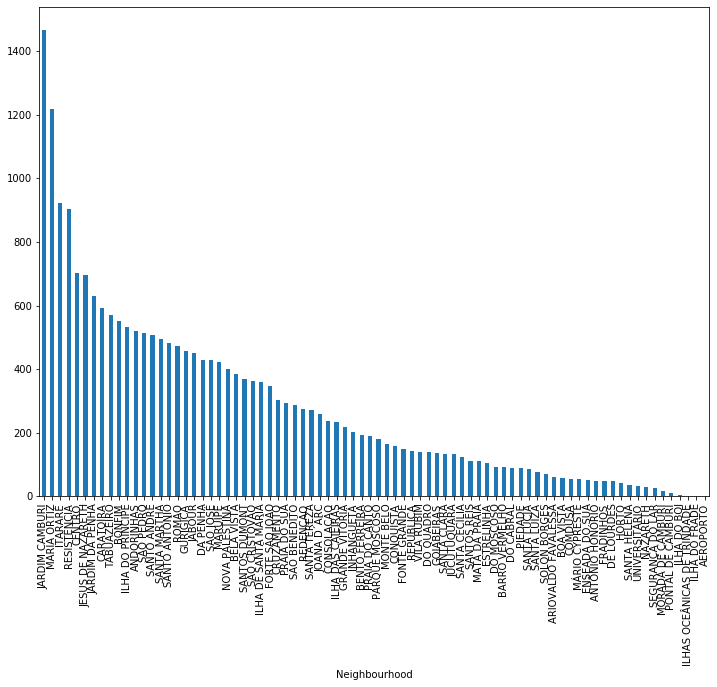

In [56]:
area_df.plot(kind='bar', figsize=(12,9))

Areas where most amount of people showed for appointment

In [57]:
area= df.query('No_Show=="No"').groupby("Neighbourhood").No_Show.count()
area.sort_values(ascending=False, inplace=True)
area

Neighbourhood
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: No_Show, Length: 80, dtype: int64

PLotting a graph  for better understanding

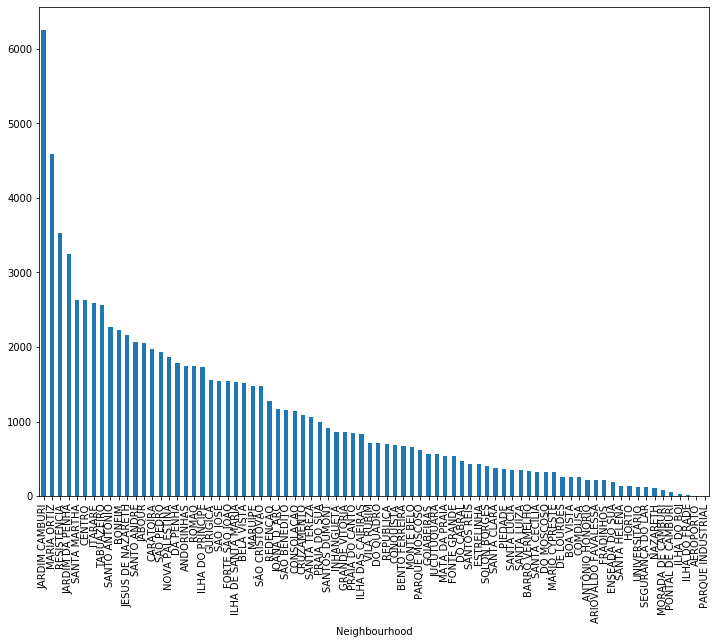

In [58]:
area.plot(kind='bar', figsize=(12,9));

The graphs clearly show that patients from certain areas are more likely to not attend their appointmets as compared to patients residing elsewhere

## Did the gender play any role in the possibilty of a patient missing their appointment?

In [60]:
female= df[df['Gender']=='F']
total_females= female.shape[0]
male= df[df['Gender']=='M']
total_males= male.shape[0]
females_who_did_not_attend = (female[["No_Show"]]=="Yes").sum()
females_who_attended = (female[["No_Show"]]=="No").sum()
males_who_did_not_attend = (male[["No_Show"]]=="Yes").sum()
males_who_attended = (male[["No_Show"]]=="No").sum()

The percentage of females who missed their appointments

In [61]:
(females_who_did_not_attend/total_females)*100

No_Show    20.311543
dtype: float64

The percentage of females who attended their appointments

In [62]:
(females_who_attended/total_females)*100

No_Show    79.688457
dtype: float64

Percentage of males who missed their appointments

In [63]:
(males_who_did_not_attend/total_males)*100

No_Show    19.96381
dtype: float64

Percentage of males who attended their appointments

In [64]:
(males_who_attended/total_males)*100

No_Show    80.03619
dtype: float64

Plotting a graph for better understanding

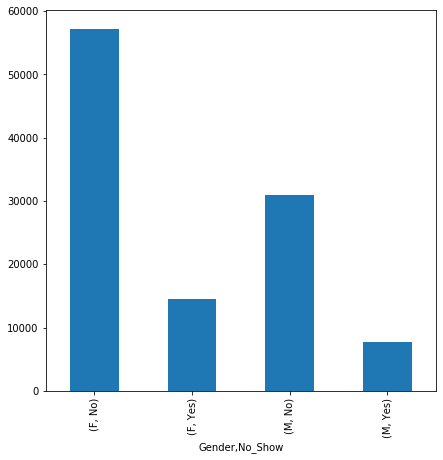

In [68]:
gender =df.groupby('Gender').No_Show.value_counts()
gender.plot(kind='bar',figsize=(7,7));

Inference


*   The percentage of female patients who missed their appointments is approximately equal to the number of male patients who misssed ther appointments
*   The percentage of female patients who attended their appointments is approximately equal to the number of male patients who attended ther appointments
* Thus, the gender of a person doesn't play a significant role in causing them to miss theri appointments



## Does the age of a person play any role in determining if the person will attend his appointment or not?

Plotting a visual of patients of different ages who did not attend their respective appointments

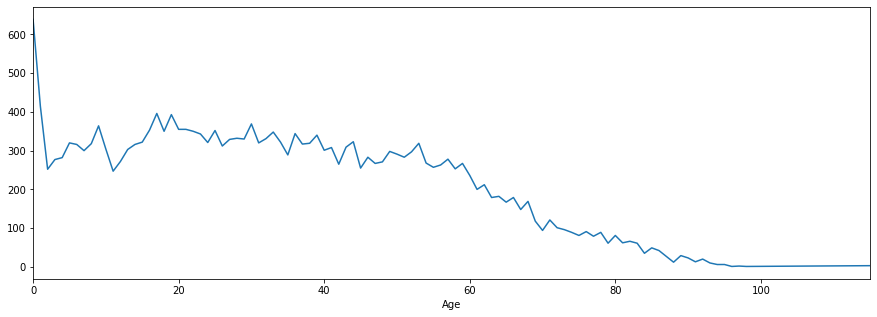

In [74]:
Age_df =df.query('No_Show == "Yes"').groupby('Age').No_Show.count()
Age_df.plot(kind='line', figsize=(15,5));

Plotting a visual of patients of different ages who attended their respective appointments

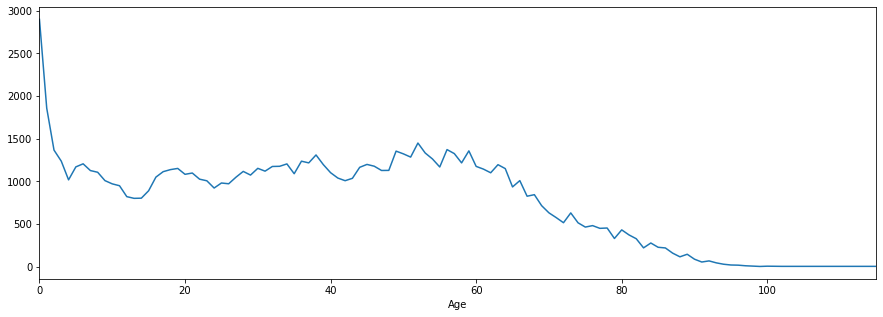

In [75]:
Age_df =df.query('No_Show == "No"').groupby('Age').No_Show.count()
Age_df.plot(kind='line', figsize=(15,5));

Inference:
* The number of no show appointents was the highest for infants and appears to be increasing upto the age of 20 years after which it declines
* The nmuber of appointnets where patients showed up is again, highest for infants which sharply declines after the age of 5 and almost remains contant till the age of 60 with soe rises after which it continues to decline
* There is no definite trend between age and possibility of patient showing for appointment

## Is there a relation of patient not showing up and the number of days a patient has to wait for the appointent?

In [0]:
Waiting_df = df[['No_show', 'Wait']].groupby('Wait').count()

Plotting a graph for better understanding

Text(0, 0.5, 'Number of people')

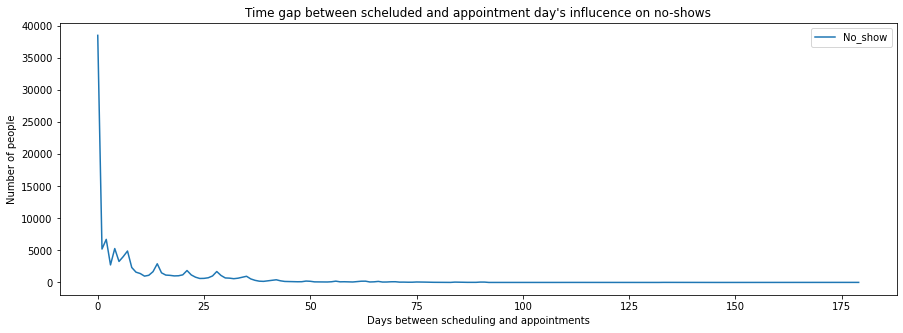

In [40]:
Waiting_df.plot(kind='line', figsize=(15,5))
plt.title("Time gap between scheluded and appointment day's influcence on no-shows")
plt.xlabel('Days between scheduling and appointments')
plt.ylabel('Number of people')

Inference:


*   Majority of patients attend their appointments if the appointments are scheduled in a small time gap, ideally on the same day



# Conclusion

1. In this project, we analyzed the no show database of patients. 
2. We analyzed all the variables of the dataset.
3. Gender of a patient does not affect the attendance of the patient for the appointment.
4. The time between the paitent scheduling his appointment and the appointment date affects the patients's probabilty to attend or miss the appointment.
5. If the time between the paitent scheduling his appointment and the appointment date is less the it increases the chances of the patient showing up for the appointment.
6. The weekday on which the appointment has been scheduled does not affect the patient's behaviour except for on Saturday when percentage of patients not showing is the least
7. Percentage of patients who received a text message are more likely to not show up as compared to patients who have not received a text message by a small amount
8. Age of a person does not affect if the patients attends or misses his appointment
9. Percentage of patient having a pre-existing medical condition like Hypertension, Diabetes, Alcoholis are as likely to miss their appointment as conpares to percentage of patients without a medical condition issing their appointments
10. In some neighbourhoods, patients are more likely to miss their appointmnets as compared to other neighbourhoods

# Thank you.